In [9]:
from google.colab import drive
drive.mount('/content/drive')

!pip install numpy -q
!pip install matplotlib -q
!pip install imageio -q
!pip install scikit-image -q

from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.restoration import unwrap_phase
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
sar_image1_path = '/content/drive/My Drive/s1a-iw1-slc-vv-20160303t211629-20160303t211657-010210-00f131-001.tiff'
sar_image2_path = '/content/drive/My Drive/s1a-iw1-slc-vv-20160420t211630-20160420t211658-010910-01059e-001.tiff'


sar_image1 = imageio.imread(sar_image1_path)
sar_image2 = imageio.imread(sar_image2_path)

sar_image1_resized = sar_image1[:, :sar_image2.shape[1]]


height, width = sar_image1.shape


crop_height_start = height // 2 - height // 10
crop_height_end = height // 2 + height // 10
crop_width_start = width // 2 - width // 10
crop_width_end = width // 2 + width // 10
sar_image1_cropped = sar_image1[crop_height_start:crop_height_end, crop_width_start:crop_width_end]
sar_image2_cropped = sar_image2[crop_height_start:crop_height_end, crop_width_start:crop_width_end]


<ipython-input-10-823e15dc47e0>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sar_image1 = imageio.imread(sar_image1_path)
<ipython-input-10-823e15dc47e0>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  sar_image2 = imageio.imread(sar_image2_path)


In [11]:

phase_diff = np.angle(sar_image2_cropped * np.conj(sar_image1_cropped))

unwrapped_phase = unwrap_phase(phase_diff)


wavelength = 0.055  # Sentinel-1 C-band wavelength (metres)
displacement = unwrapped_phase * (wavelength / (4 * np.pi))


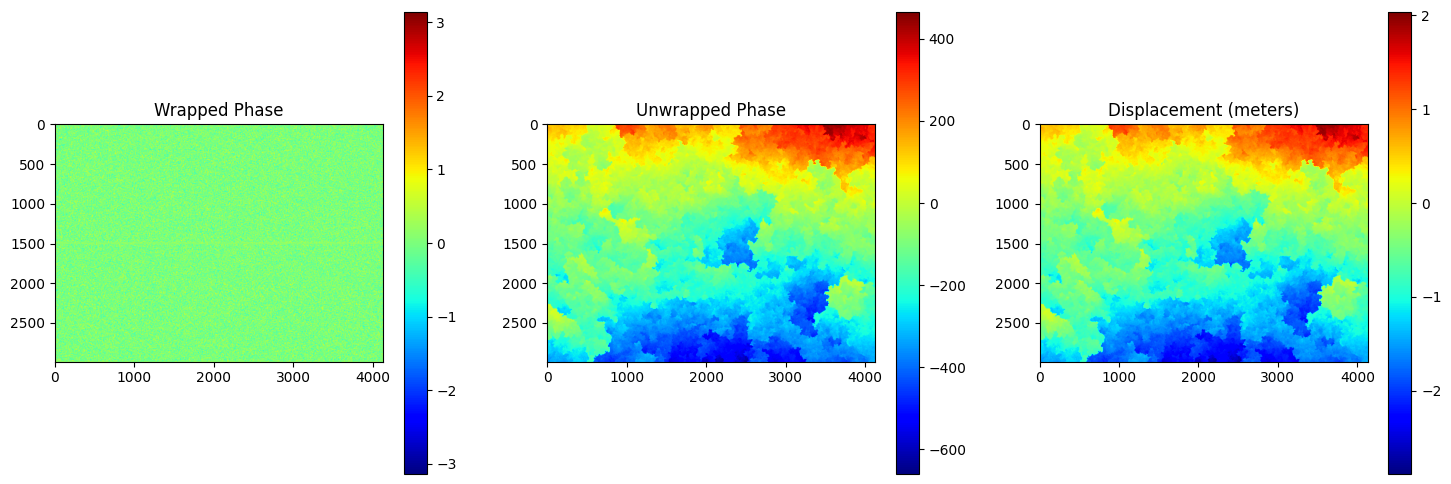

In [12]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Wrapped Phase')
plt.imshow(phase_diff, cmap='jet')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Unwrapped Phase')
plt.imshow(unwrapped_phase, cmap='jet')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Displacement (meters)')
plt.imshow(displacement, cmap='jet')
plt.colorbar()

plt.show()
